## S-Mobile: Predicting Customer Churn

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group 5
* Team member names:
    - Bansari Kathrotia
    - Brian Gao
    - Fernando Santibanez
    - Sheena Tylor

## Setup

Please complete this Jupyter notebook by answering the questions in `s-mobile.pdf` on Canvas. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. Please also push your final notebook to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML from the Jupyter Notebook file without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is a group assignment for MGTA 455 and you will be using git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". git will not decide for you who's change to accept so the team-lead will have to determine which edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

## Setup

Please complete this python notebook with your group by answering the questions in `s-mobile-msba.pdf`.

Create a Notebook with all your results and comments and push the Notebook to GitHub when your team is done. Make sure to connect the GitHub repo to GradeScope before the due date. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is a group assignment and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - model1.ipynb, question1.ipynb, etc.
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [298]:
import pandas as pd
import pyrsm as rsm
rsm.__version__ # should be 0.9.20 or newer

'0.9.19'

In [299]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_parquet("data/s_mobile.parquet")

In [300]:
rsm.md("data/s_mobile_description.md")

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care 
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls 
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


If you want access to the full 1M row dataset, use the code below to download and use the data. Please do **not** include the 1M row dataset in your repo!

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [301]:
s_mobile_1M = pd.read_parquet("https://www.dropbox.com/scl/fi/upm68ytk5r7oz2xd61qau/s_mobile_1M.parquet?rlkey=0pap46l024yryr4h08mvexiha&dl=1")
s_mobile_1M

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004995,U63357590,no,2,34,54,778,115,1,1,7,...,no,yes,no,no,no,no,NW,other,0.0,0
1004996,U10548621,no,-5,-20,31,176,40,3,0,35,...,no,no,no,no,no,no,CS,retired,1.0,0
1004997,U61718563,no,-3,-2,45,1731,105,0,0,30,...,no,yes,no,no,no,no,SW,other,1.0,0
1004998,U79998923,no,73,46,108,1156,144,18,0,18,...,no,yes,no,no,no,no,CS,other,0.0,0


In [302]:
s_mobile_1M.columns

Index(['customer', 'churn', 'changer', 'changem', 'revenue', 'mou', 'overage',
       'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls',
       'dropvce', 'eqpdays', 'refurb', 'smartphone', 'highcreditr', 'mcycle',
       'car', 'travel', 'region', 'occupation', 'training', 'representative'],
      dtype='object')

In [303]:
s_mobile = pd.read_parquet("data/s_mobile.parquet")
s_mobile

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,54,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,no,yes,NW,professional,NaN,1
3,U75794640,no,0,-8,35,560,0,0,0,37,...,no,yes,yes,yes,no,no,NW,retired,1.0,0
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,no,yes,yes,no,SW,other,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,U97081813,no,0,-15,33,49,0,0,0,19,...,no,yes,no,yes,yes,no,SW,other,NaN,1
68996,U24071089,no,0,95,30,78,0,0,0,18,...,no,no,no,yes,yes,no,SE,other,1.0,0
68997,U52895026,yes,0,5,43,250,53,0,0,25,...,no,no,no,no,no,no,CS,student,0.0,0
68998,U69840472,yes,-3,-29,41,288,0,0,0,19,...,no,yes,no,no,no,no,CS,other,1.0,0


In [304]:
# Filter the representative sample and check if churn rate is 2%
rep_sample = s_mobile[s_mobile['representative'] == 1]

# Calculate the churn rate
churn_rate = (rep_sample['churn'] == 'yes').mean() * 100

print(f"The churn rate in the representative sample is: {churn_rate}%")

rep_sample_1M = s_mobile_1M[s_mobile_1M['representative'] == 1]

# Calculate the churn rate
churn_rate = (rep_sample_1M['churn'] == 'yes').mean() * 100

print(f"The churn rate in the representative sample from 1M customer data is: {churn_rate}%")


The churn rate in the representative sample is: 2.0%
The churn rate in the representative sample from 1M customer data is: 2.0%


In [305]:
# run python code from another notebook
# rsm.md_notebook("./sub-notebooks/model1.ipynb")
# %run ./sub-notebooks/model1.ipynb

In [306]:
# importing functions from a module/package
# from utils import functions

# functions.example()

## Question answers

In [307]:
# show descriptive stats on the training data
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, "churn":],
    drop_first=True
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.25895,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.26348,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.19297,0.0,32.0


In [308]:
# show churn in the representative sample
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
    drop_first=True
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.310567,28.49632,-90.0,437.0
changem,17.254533,51.37539,-78.0,540.0
revenue,56.6348,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.7234,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.2964,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [309]:
# count all the distinct value of churn in the dataset
s_mobile.churn.value_counts()

churn
no     48900
yes    20100
Name: count, dtype: int64

In [310]:
# churn rate is 2% which is 1/50 customers churn and 49/50 customers do not churn

class_weight_dict = {0: 49, 1: 1}
s_mobile["cweight"] = rsm.ifelse(
    s_mobile.churn == "yes", class_weight_dict[1], class_weight_dict[0]
)
s_mobile["cweight"]

# count the unique value of cweight
s_mobile.cweight.value_counts()

cweight
49    48900
1     20100
Name: count, dtype: int64

In [311]:
# run the model in radiant
# rsm.radiant.logistic(s_mobile)

## Question 1:

### Develop a model to predict customer churn
- Feel free to use any technique you like to predict churn. However, one of your models must
be a logistic regression.
- Build models using the training data and explain your modeling choices

In [312]:
idvar = "customer"
rvar = "churn"
evar=[
        "changer",
        "changem",
        "revenue",
        "mou",
        "overage",
        "roam",
        "conference",
        "months",
        "uniqsubs",
        "custcare",
        "retcalls",
        "dropvce",
        "eqpdays",
        "refurb",
        "smartphone",
        "highcreditr",
        "mcycle",
        "car",
        "travel",
        "region",
        "occupation",
    ]

In [313]:
lr = rsm.model.logistic(
    data={"s_mobile": s_mobile.query("training == 1")},
    rvar="churn",
    lev="yes",
    evar= evar,
)
lr.summary(
    )


Logistic regression (GLM)
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

                             OR     OR%  coefficient  std.error  z.value p.value     
Intercept                 0.858  -14.2%        -0.15      0.081   -1.903   0.057    .
refurb[yes]               1.351   35.1%         0.30      0.038    7.952  < .001  ***
smartphone[yes]           0.910   -9.0%        -0.09      0.047   -2.004   0.045    *
highcreditr[yes]          0.492  -50.8%        -0.71      0.040  -17.759  < .001  ***
mcycle[yes]               0.900  -10.0%        -0.11      0.043   -2.473   0.013    *
car[yes]                  1.001    0.1%         0.00      0.057    0.0

In [314]:
lrw = rsm.model.logistic(
    data={"s_mobile": s_mobile.query("training == 1")},
    rvar="churn",
    lev="yes",
    evar= evar,
    weights="cweight",
)
lrw.summary()

Logistic regression (GLM)
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Weights used         : cweight
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

                             OR     OR%  coefficient  std.error  z.value p.value     
Intercept                 0.019  -98.1%        -3.96      0.053  -75.363  < .001  ***
refurb[yes]               1.318   31.8%         0.28      0.025   11.018  < .001  ***
smartphone[yes]           0.913   -8.7%        -0.09      0.030   -3.043   0.002   **
highcreditr[yes]          0.483  -51.7%        -0.73      0.031  -23.696  < .001  ***
mcycle[yes]               0.883  -11.7%        -0.12      0.029   -4.329  < .001  ***
car[yes]                  0.991   -0.9%

The logistic regression model constructed to predict customer churn at S-Mobile was chosen for its binary classification strength and the interpretability of its output. The model was trained on a specified portion of the dataset (training == 1), which allows for a focused learning environment, minimizing the risk of overfitting.

We defined the outcome of interest as churn, indicating whether customers discontinued their services within the preceding 30 days. To tackle the inherent class imbalance within the dataset—a common issue in churn predictions—we utilized a custom weighting scheme captured in the cweight column. These weights were inversely related to the class frequencies, thereby amplifying the minority class's impact on the model to reflect the actual churn rate more accurately and improve the model's sensitivity to potential churners.

Explanatory variables were chosen based on their expected influence on customer churn. These included variables reflecting customer engagement and usage changes (changer, changem), as well as demographic characteristics like region and occupation. For instance, variables like highcreditr, indicating a high credit rating, and device-related attributes like smartphone, contributed significant explanatory power to the model, as evidenced by their coefficients and p-values.

Our model evaluation focused on the Area Under the ROC Curve (AUC) and the likelihood ratio chi-squared test. An AUC of 0.688 indicates the model's decent capacity to differentiate between churned and retained customers, while the highly significant chi-squared statistic (p < 0.001) confirms the model's explanatory variables collectively have predictive relevance.

Importantly, the application of cweight allowed for more nuanced predictions by offsetting the lower incidence of churn within the customer base. It also led to an enriched interpretation of customer behavior, as highlighted by the negative correlation of owning a refurbished phone (refurb[yes]) with churn, an insight suggesting customers' contentment with such products.

In conclusion, this model leverages detailed customer data, employing a weighted logistic regression approach that considers both behavioral patterns and demographic factors to predict churn, providing S-Mobile with actionable insights to retain their customer base.

In [315]:
lrw.coef[1:].round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,refurb[T.yes],1.318,31.831,0.276,0.025,11.018,0.000,***
2,smartphone[T.yes],0.913,-8.700,-0.091,0.030,-3.043,0.002,**
3,highcreditr[T.yes],0.483,-51.663,-0.727,0.031,-23.696,0.000,***
4,mcycle[T.yes],0.883,-11.744,-0.125,0.029,-4.329,0.000,***
5,car[T.yes],0.991,-0.924,-0.009,0.038,-0.241,0.809,
6,travel[T.yes],0.781,-21.887,-0.247,0.039,-6.278,0.000,***
7,region[T.NE],0.644,-35.608,-0.440,0.026,-16.635,0.000,***
8,region[T.NW],0.660,-34.020,-0.416,0.026,-15.868,0.000,***
9,region[T.SE],0.651,-34.949,-0.430,0.026,-16.420,0.000,***
10,region[T.SW],0.627,-37.311,-0.467,0.026,-17.667,0.000,***


## Question 2:
- Use your model to describe the main drivers of churn and report on the key factors that predict customer churn and their relative importance.
- Briefly discuss 5 key drivers of churn from your analysis in this step using Variable
Importance (Permutation Importance) and Prediction or Partial Dependence plots

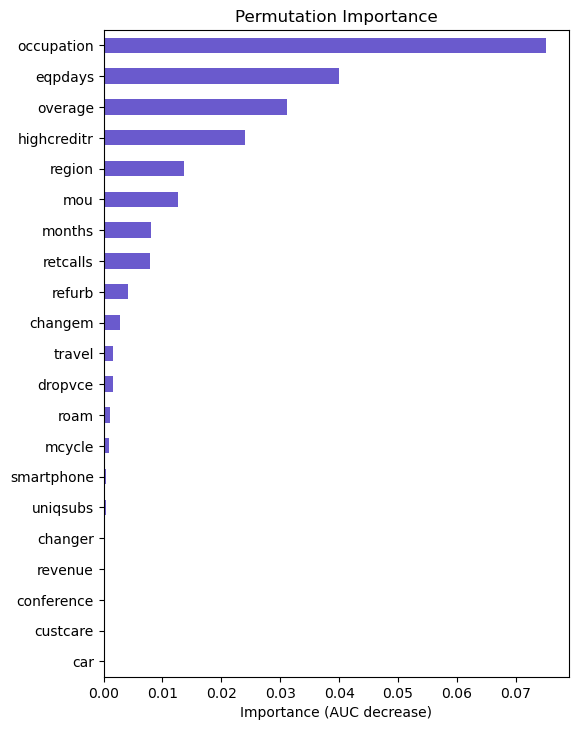

In [316]:
# get permutation importance graph for the 1 million customer data
lrw.plot("vimp", 
         data = s_mobile[s_mobile.training == 1])

### Five features that are important in predicting customer churn:

1. Occupation: The occupation variable shows a significant impact on churn. Different occupational categories have different churn behaviors, likely due to varying levels of reliance on mobile services, income stability, and service needs. Students, for example, showed a higher propensity to churn, possibly due to budget constraints or a higher likelihood of changing locations.

2. Equipment Days (eqpdays): This represents how long a customer has been using their current handset. A longer period might indicate a reluctance to upgrade due to satisfaction with the current device or service, or it could indicate a potential opportunity for upgrading customers to newer technology as part of retention strategies.

3. Overage: Customers who frequently exceed their plan's limits may experience dissatisfaction due to unexpected charges, leading to a higher risk of churn. Addressing this through plan adjustments or more transparent overage policies could be effective churn reduction measures.

4. High Credit Rating (highcreditr): A high credit rating might correlate with financial stability and a decreased likelihood to churn. Customers with higher credit ratings could be targeted for premium services or loyalty programs, ensuring long-term retention.

5. Region: Variations in churn by region could indicate differing market conditions, such as competitive pressures or demographic factors. Understanding regional differences can help tailor localized marketing strategies and service offerings to reduce churn.



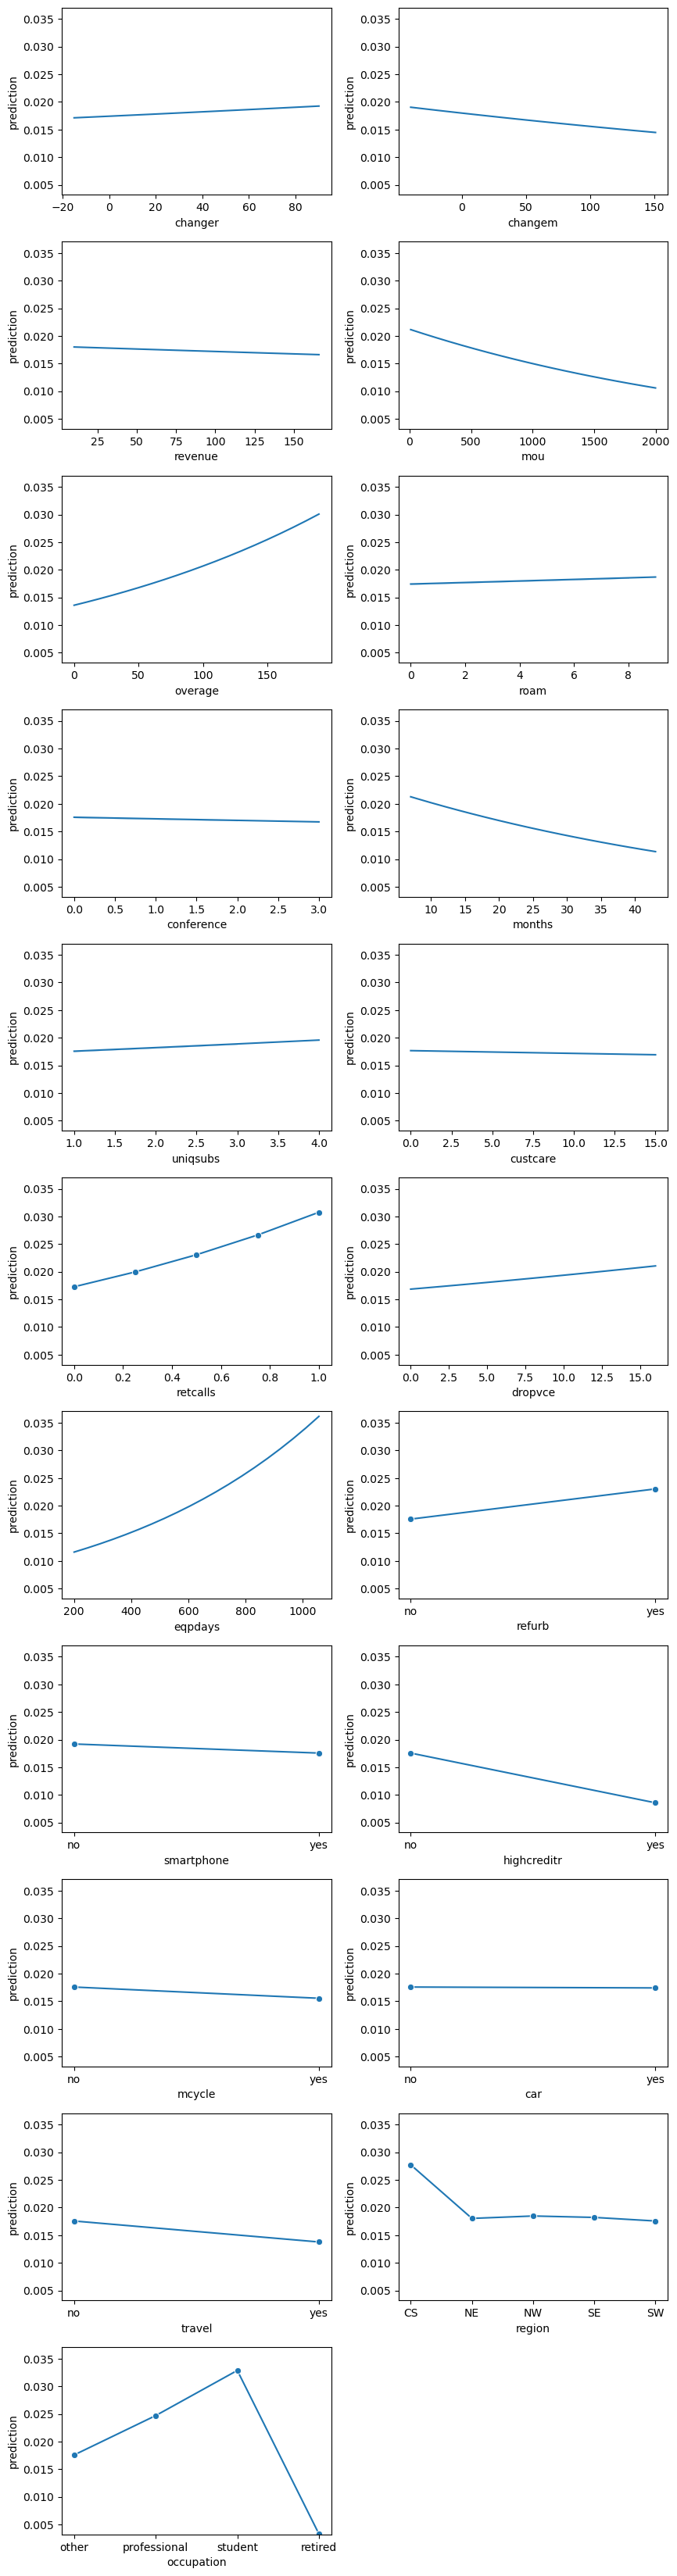

In [317]:
# prediction plots
lrw.plot("pred",
         data = s_mobile_1M[s_mobile_1M.training == 1],
         incl = evar)

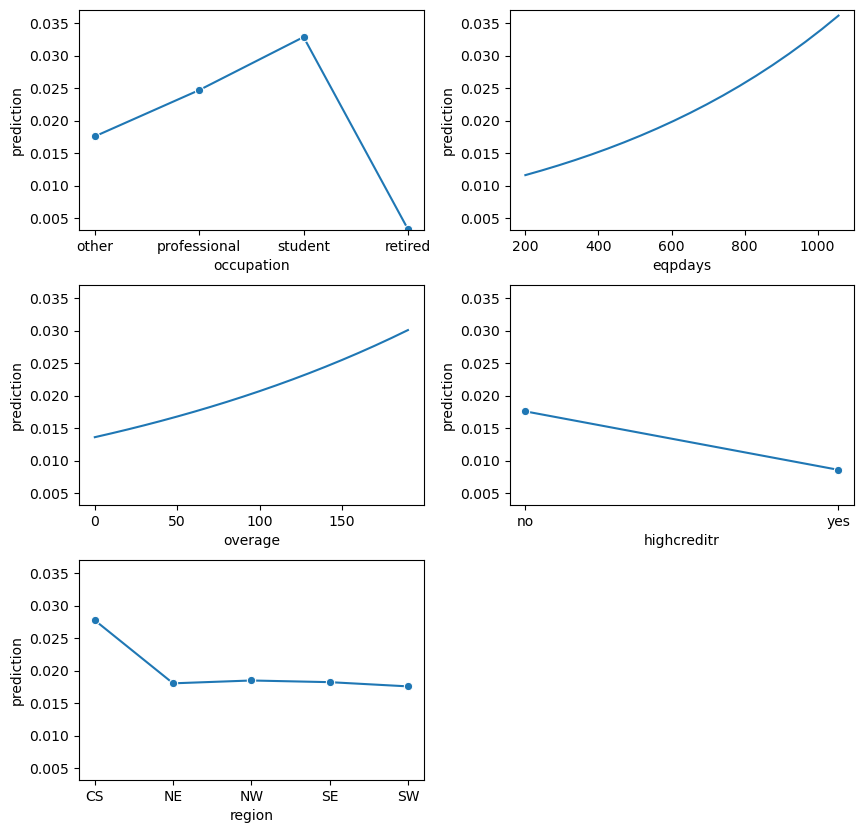

In [318]:
# top 5 most important variables impacting churn
lrw.plot("pred",
         data = s_mobile_1M[s_mobile_1M.training == 1],
         incl = ["occupation", "eqpdays", "overage", "highcreditr", "region"])

## Question 3:

- Use insights on churn drivers to develop actions/offers/incentives
- Consider each variable type, e.g., “Equipment characteristic”, “Customer usage”, etc. (see
the data table at the end of this case)

1. Equipment Characteristics
- Handset Age (eqpdays): Longer handset age is associated with higher churn. Customers may churn because they desire newer technology or better functionality.
- Action: Offer timely upgrades or discounts on new handsets to customers who have had their handsets beyond a specific period.
2. Customer Usage
- Overage (overage): Customers who consistently exceed their plan limits might be dissatisfied with the current plan.
- Action: Introduce more flexible plans with higher data or minutes caps, or implement a rollover system for unused data/minutes.
3. Customer Service Interactions
- Customer Care Calls (custcare): High frequency might indicate issues or dissatisfaction.
- Action: Enhance customer service training, or introduce a premium support line to provide a better service experience.
4. Customer Demographics
- Occupation (occupation): Certain occupations, like students, might have higher churn rates.
- Action: Create occupation-based offers, such as student discounts, to retain this segment.
5. Credit and Billing
- Credit Rating (highcreditr): A high credit rating appears to decrease the likelihood of churn, which might reflect a more stable customer base.
- Action: Offer loyalty rewards or better financing options for new devices to customers with high credit ratings.

## Question 4:

Quantify the impact of these actions/offers/incentives on the probability of churn 

• Either (i) predict the effect of a churn driver (similar to what we did for Pentathlon NPTB) or 
(ii) suggest how you might set up an experiment (RCT) to evaluate the action/incentive/offer 
in the field 

• Generate predictions for the representative sample 

• Since it is not feasible to execute an RCT, describe how you would set up such an 
experiment and then make an assumption about the impact on churn that you can use in 
steps 5 and 6

In [319]:
s_mobile_rep = s_mobile.query("representative == 1").copy()

In [320]:
s_mobile_rep

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative,cweight
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,yes,no,yes,no,yes,NW,professional,NaN,1,49
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,yes,no,yes,yes,no,SW,other,NaN,1,49
5,U18263157,no,-2,-7,45,504,73,2,0,11,...,yes,no,no,no,no,SW,other,NaN,1,49
7,U18798421,no,96,38,60,777,133,0,1,7,...,yes,yes,yes,yes,no,NW,other,NaN,1,49
10,U30117312,no,1,126,30,19,0,0,0,13,...,yes,yes,no,no,no,NW,other,NaN,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68985,U88554636,no,0,-4,50,630,0,0,0,28,...,yes,no,no,no,yes,NE,student,NaN,1,49
68988,U68703099,no,0,-3,61,97,0,0,0,10,...,yes,no,no,no,no,SW,other,NaN,1,49
68991,U19865602,no,0,-8,33,322,0,0,0,16,...,yes,no,yes,yes,no,CS,professional,NaN,1,49
68995,U97081813,no,0,-15,33,49,0,0,0,19,...,yes,no,yes,yes,no,SW,other,NaN,1,49


In [321]:
# impact of offering new devices or discounted devices.
s_mobile["churn_yes"] = rsm.ifelse(s_mobile.churn == "yes", 1, 0)
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep["p_newhs"] = lrw.predict(s_mobile_rep.assign(eqpdays=0))["prediction"]
s_mobile_rep.loc[s_mobile_rep.eqpdays > 0, ["churn_yes", "p_newhs"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_newhs
count,30000.00,30000.0000
mean,0.02,0.0098


In [322]:
# impact of reducing the overage 
s_mobile["churn_yes"] = rsm.ifelse(s_mobile.churn == "yes", 1, 0)
s_mobile_rep["p_overage"] = lrw.predict(s_mobile_rep.assign(overage=0))["prediction"]
s_mobile_rep.loc[s_mobile_rep.overage > 0, ["churn_yes", "p_overage"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_overage
count,16264.0000,16264.0000
mean,0.0243,0.0139


## Question 5:
Decide which actions/offers/incentives to target to which customers 
• For each action/offer/incentive specify the criteria used to select customers. Will you apply 
the action/offer/incentive to all customers, or a subset? Motivate your approach

In [323]:
# impact of offering new devices or discounted devices to different group of people.
s_mobile_rep_student = s_mobile_rep[s_mobile_rep['occupation'] == 'student']
s_mobile_rep_retired = s_mobile_rep[s_mobile_rep['occupation'] == 'retired']
s_mobile_rep_other = s_mobile_rep[s_mobile_rep['occupation'] == 'other']
s_mobile_rep_prof = s_mobile_rep[s_mobile_rep['occupation'] == 'professional']

In [324]:
# mean of original prediction
student_o = lrw.predict(s_mobile_rep_student)["prediction"].mean()
retired_o = lrw.predict(s_mobile_rep_retired)["prediction"].mean()
other_o = lrw.predict(s_mobile_rep_other)["prediction"].mean()
professional_o = lrw.predict(s_mobile_rep_prof)["prediction"].mean()

In [325]:
# mean of assigning epqdays = 0
student = lrw.predict(s_mobile_rep_student.assign(eqpdays=0))["prediction"].mean()
retired = lrw.predict(s_mobile_rep_retired.assign(eqpdays=0))["prediction"].mean()
other = lrw.predict(s_mobile_rep_other.assign(eqpdays=0))["prediction"].mean()
professional = lrw.predict(s_mobile_rep_prof.assign(eqpdays=0))["prediction"].mean()

In [326]:
# percentage changes based on occupations
student_churn = ((student_o-student)/student_o).round(4)
retired_churn = ((retired_o-retired)/retired_o).round(4)
other_churn = ((other_o-other)/other_o).round(4)
prof_churn = ((professional_o-professional)/professional_o).round(4)

In [327]:
[student_churn, retired_churn, other_churn, prof_churn]

[0.5023, 0.5329, 0.4896, 0.5324]

In [328]:
student_over = lrw.predict(s_mobile_rep_student.assign(overage=0))["prediction"].mean()
retired_over = lrw.predict(s_mobile_rep_retired.assign(overage=0))["prediction"].mean()
other_over = lrw.predict(s_mobile_rep_other.assign(overage=0))["prediction"].mean()
professional_over = lrw.predict(s_mobile_rep_prof.assign(overage=0))["prediction"].mean()

In [329]:
# percentage changes based on occupations
student_churn_over = ((student_o-student_over)/student_o).round(4)
retired_churn_over = ((retired_o-retired_over)/retired_o).round(4)
other_churn_over = ((other_o-other_over)/other_o).round(4)
prof_churn_over = ((professional_o-professional_over)/professional_o).round(4)

In [330]:
[student_churn_over, retired_churn_over, other_churn_over, prof_churn_over ]

[0.2179, 0.2262, 0.2411, 0.192]

Based on the analysis, we discovered that lowering equipment age (epqdays) or ensuring customers use newer devices significantly reduces churn probability. Subsequently, by categorizing customers into occupational groups—student, retired, other, and professional—we assessed which demographic would benefit most from this approach. It emerged that offering newer devices to retired individuals and professionals is the most efficient strategy for decreasing churn likelihood. In this case, we are assuming customers will buy a new phone at the price of our cost of getting them, and the buying new phone action won’t change their churn rate. In reality, there are more actions we can take, for example, partner with a phone manufacturer, etc. Since we don't know what is the cost is going to be to achieve this, so we can't decide if only targeting retired and professionals is better than targeting everyone. Thus, we will only focusing on if targeting everyone.

Similarly, we found that reducing the overage is the most efficient when targeting other and retired people. However, we will also only focusing on everyone.

## Question 6. 
Evaluate the economics (CLV):  
• For two actions/offers/incentives provide a comprehensive evaluation of the profitability 
implications using a 5-year (60 month) time window

In [333]:
# According to financial reports of Singapore Telecommunication Limited (billion)
Revenue_2017 = 12.12
Revenue_2018 = 13.37
Revenue_2019 = 12.99
Revenue_2020 = 11.76
Revenue_2021 = 11.74
Revenue_2022 = 11.44
Revenue_2023 = 11.15
Profit_2017 = 2.743
Profit_2018 = 4.16
Profit_2019 = 2.267
Profit_2020 = 0.7402
Profit_2021 = 0.3165
Profit_2022 = 1.447
Profit_2023 = 1.680

revenues = [12.12, 13.37, 12.99, 11.76, 11.74, 11.44, 11.15]
profits = [2.743, 4.16, 2.267, 0.7402, 0.3165, 1.447, 1.680]

# Calculate profit margins for each year as a percentage
profit_margins = [(profit / revenue) * 100 for profit, revenue in zip(profits, revenues)]

# Calculate the average profit margin
average_profit_margin = sum(profit_margins) / len(profit_margins)/100
average_profit_margin

0.15414904234868357

From the financial reports from 2017-2023 of a leading Singapore telecommunication company, we found the profit margin is approximately 15.4%. We then assume that for each customer, our profit margin remains 15.4%.

In [357]:
monthly_churn = 0.02
charge_per_customer_month = 10
profit_per_customer_month = charge_per_customer_month*average_profit_margin
profit_30k = charge_per_customer_month*average_profit_margin*30000
profit_exp_avg = 0
discount_rate = 0.008


In [335]:
# Calculation for profit without any actions/offers/incentives for representative group

for i in range(1, 61):  # Calculating for 5 years (60 months)
    prob_end_period = 0.98 ** i  # Probability of a customer remaining at the end of the period
    # Calculating the prop_average_period as the average of the current and previous prob_end_period
    if i == 1:  # For the first period, there's no previous period, so it equals the current period
        prop_average_period = prob_end_period
    else:
        prop_average_period = (prob_end_period + previous_prob_end_period) / 2
    
    profit_exp_avg += (profit_30k * prop_average_period) / ((1 + discount_rate) ** i) 
    previous_prob_end_period = prob_end_period 

profit_exp_avg

1332993.991050903

The CLV for the representative group over 5 years is equal to $1,332,993.99.

In [356]:
# Calculation for profit with people getting new phones
for i in range(1, 61):  # Calculating for 5 years (60 months)
    # Probability of a customer remaining at the end of the period. With adjustment of 0.00017 to represent equipment getting older and older.
    prob_end_period = (1-0.0098-0.00017) ** i  
    # Calculating the prop_average_period as the average of the current and previous prob_end_period
    if i == 1:  # For the first period, there's no previous period, so it equals the current period
        prop_average_period = prob_end_period
    else:
        prop_average_period = (prob_end_period + previous_prob_end_period) / 2
    profit_exp_avg += (profit_30k * prop_average_period) / ((1 + discount_rate) ** i) 
    previous_prob_end_period = prob_end_period 

profit_exp_avg

1690194.6546717924

The CLV for the representative group over 5 years with getting new handsets is equal to $1,690,194.65.

In [358]:
# Calculation for profit with people getting new phones
for i in range(1, 61):  # Calculating for 5 years (60 months)
    # Probability of a customer remaining at the end of the period. With adjustment of 0.00017 to represent equipment getting older and older.
    prob_end_period = (1-0.0139) ** i  
    # Calculating the prop_average_period as the average of the current and previous prob_end_period
    if i == 1:  # For the first period, there's no previous period, so it equals the current period
        prop_average_period = prob_end_period
    else:
        prop_average_period = (prob_end_period + previous_prob_end_period) / 2
    profit_exp_avg += (profit_30k * prop_average_period) / ((1 + discount_rate) ** i) 
    previous_prob_end_period = prob_end_period 

profit_exp_avg

1535310.641893457

The CLV for the representative group over 5 years with getting unlimited plans is equal to $1,535,310.64.

### Generative AI (5 points): 
Describe in detail how your team used Generative AI-tools like 
ChatGPT to support your work on this case. Provide pdfs and/or screenshots of your 
"discussions" with these tools and comment on what things did and did not go well. 


We used AI mostly for convenience for this assignment. For instance, we told it how to create certain variables and let it create for us given a chunk of code. That way it not only checked if our code is right, but we saved some time to think through how to translate our thoughts into code. Moreover, we also asked it to refine some of our wordings. Lastly, we asked it about financial information about financial information about cellphone carrier in Singapore but ChatGPT was not able to answer the question, so we ended up finding the information elsewhere.